# Academic Success Classification

## import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(context = 'notebook', palette = 'pastel', style = 'whitegrid')
import warnings
warnings.simplefilter('ignore')
import time
from IPython.display import display, HTML

## Data Loading and Overview

In [28]:
train = pd.read_csv('/content/drive/MyDrive/Classification with an Academic Success Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Classification with an Academic Success Dataset/test.csv')
original_data = pd.read_csv('/content/drive/MyDrive/Classification with an Academic Success Dataset/data.csv', delimiter = ';')      # from uci machine learning repository
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
train.shape

(76518, 38)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [7]:
train.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [8]:
train.duplicated().sum()

0

- No duplicates and no missing values.

In [9]:
# separate the features columns
features_list = train.columns.to_list()[:-1]
len(features_list)

37

In [10]:
for i in train.columns[:-1]:
  print(i, train[i].nunique())

id 76518
Marital status 6
Application mode 22
Application order 8
Course 19
Daytime/evening attendance 2
Previous qualification 21
Previous qualification (grade) 110
Nacionality 18
Mother's qualification 35
Father's qualification 39
Mother's occupation 40
Father's occupation 56
Admission grade 668
Displaced 2
Educational special needs 2
Debtor 2
Tuition fees up to date 2
Gender 2
Scholarship holder 2
Age at enrollment 46
International 2
Curricular units 1st sem (credited) 21
Curricular units 1st sem (enrolled) 24
Curricular units 1st sem (evaluations) 36
Curricular units 1st sem (approved) 23
Curricular units 1st sem (grade) 1206
Curricular units 1st sem (without evaluations) 12
Curricular units 2nd sem (credited) 20
Curricular units 2nd sem (enrolled) 22
Curricular units 2nd sem (evaluations) 31
Curricular units 2nd sem (approved) 21
Curricular units 2nd sem (grade) 1234
Curricular units 2nd sem (without evaluations) 11
Unemployment rate 11
Inflation rate 13
GDP 11


In [11]:
# categorical features
cat_features = [col for col in train.columns if train[col].nunique() <= 8]

# numerical features
num_features = train.columns.to_list()
for cat in cat_features:
  num_features.remove(cat)


In [12]:
cat_features.remove('Target')

In [13]:
len(cat_features), len(num_features)

(10, 27)

In [14]:
num_features.remove('id')

In [15]:
# Function to create a scrollable table within a small window
def scrollable_table(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += data.to_html()
    html += '</div>'
    return html

In [16]:
# Summary statistics for numerical features
summary_stats = train[num_features].describe().T
html_numerical = scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000
Father's qualification,76518.0,23.425076,14.921164,1.00,4.000000,19.000000,37.000000,44.000
Mother's occupation,76518.0,8.583196,17.471591,0.00,4.000000,7.000000,9.000000,194.000
Father's occupation,76518.0,8.882172,16.803940,0.00,5.000000,7.000000,9.000000,195.000
Admission grade,76518.0,125.363971,12.562328,95.00,118.000000,124.600000,132.000000,190.000


In [17]:
# Summary statistics for categorical features
cat_summary_stats = train[cat_features].describe().T
html_categorical = scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

,count,mean,std,min,25%,50%,75%,max
Marital status,76518.0,1.111934,0.441669,1.0,1.0,1.0,1.0,6.0
Application order,76518.0,1.644410,1.229645,0.0,1.0,1.0,2.0,9.0
Daytime/evening attendance,76518.0,0.915314,0.278416,0.0,1.0,1.0,1.0,1.0
Displaced,76518.0,0.569265,0.495182,0.0,0.0,1.0,1.0,1.0
Educational special needs,76518.0,0.003738,0.061023,0.0,0.0,0.0,0.0,1.0
Debtor,76518.0,0.071382,0.257463,0.0,0.0,0.0,0.0,1.0
Tuition fees up to date,76518.0,0.893646,0.308292,0.0,1.0,1.0,1.0,1.0
Gender,76518.0,0.315821,0.464845,0.0,0.0,0.0,1.0,1.0
Scholarship holder,76518.0,0.247393,0.431500,0.0,0.0,0.0,0.0,1.0
International,76518.0,0.006626,0.081130,0.0,0.0,0.0,0.0,1.0


In [18]:
# Summary statistics for target feature
train['Target'].describe().T

count        76518
unique           3
top       Graduate
freq         36282
Name: Target, dtype: object

## Exploratory Data Analysis

### Target Distribution

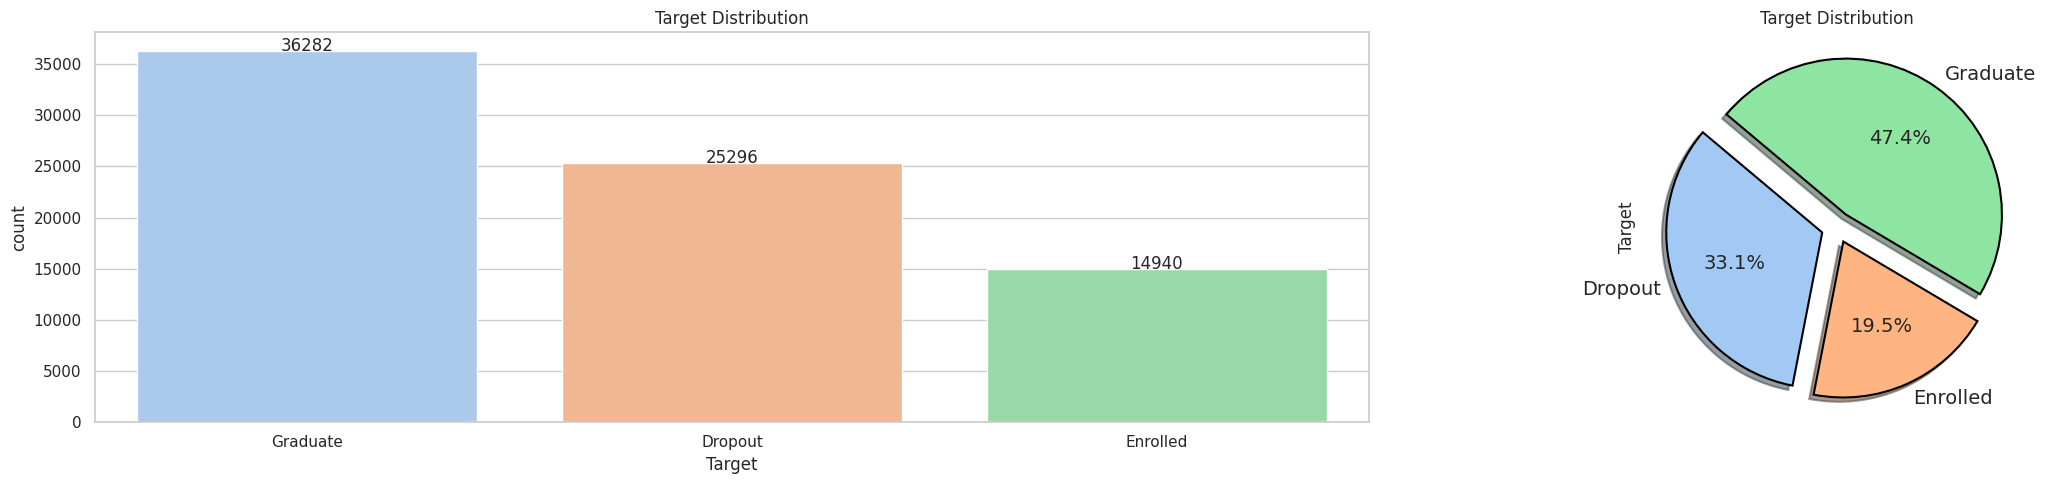

In [19]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.countplot(x='Target', data=train, palette='pastel', ax = axes[0])

# Add labels to each bar in the plot
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")
axes[0].set_title('Target Distribution')

palette_color = sns.color_palette('pastel')
explode = [0.1 for _ in range(train['Target'].nunique())]

# Plotting
train.groupby('Target')['Target'].count().plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,  # Adding shadow for better visibility
    startangle=140,  # Start angle for better alignment
    textprops={'fontsize': 14},  # Adjust text size
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, # Adding edge color and width
    ax = axes[1]
)

# Adding a title
axes[1].set_title('Target Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



### Distribution Of Categorical Features



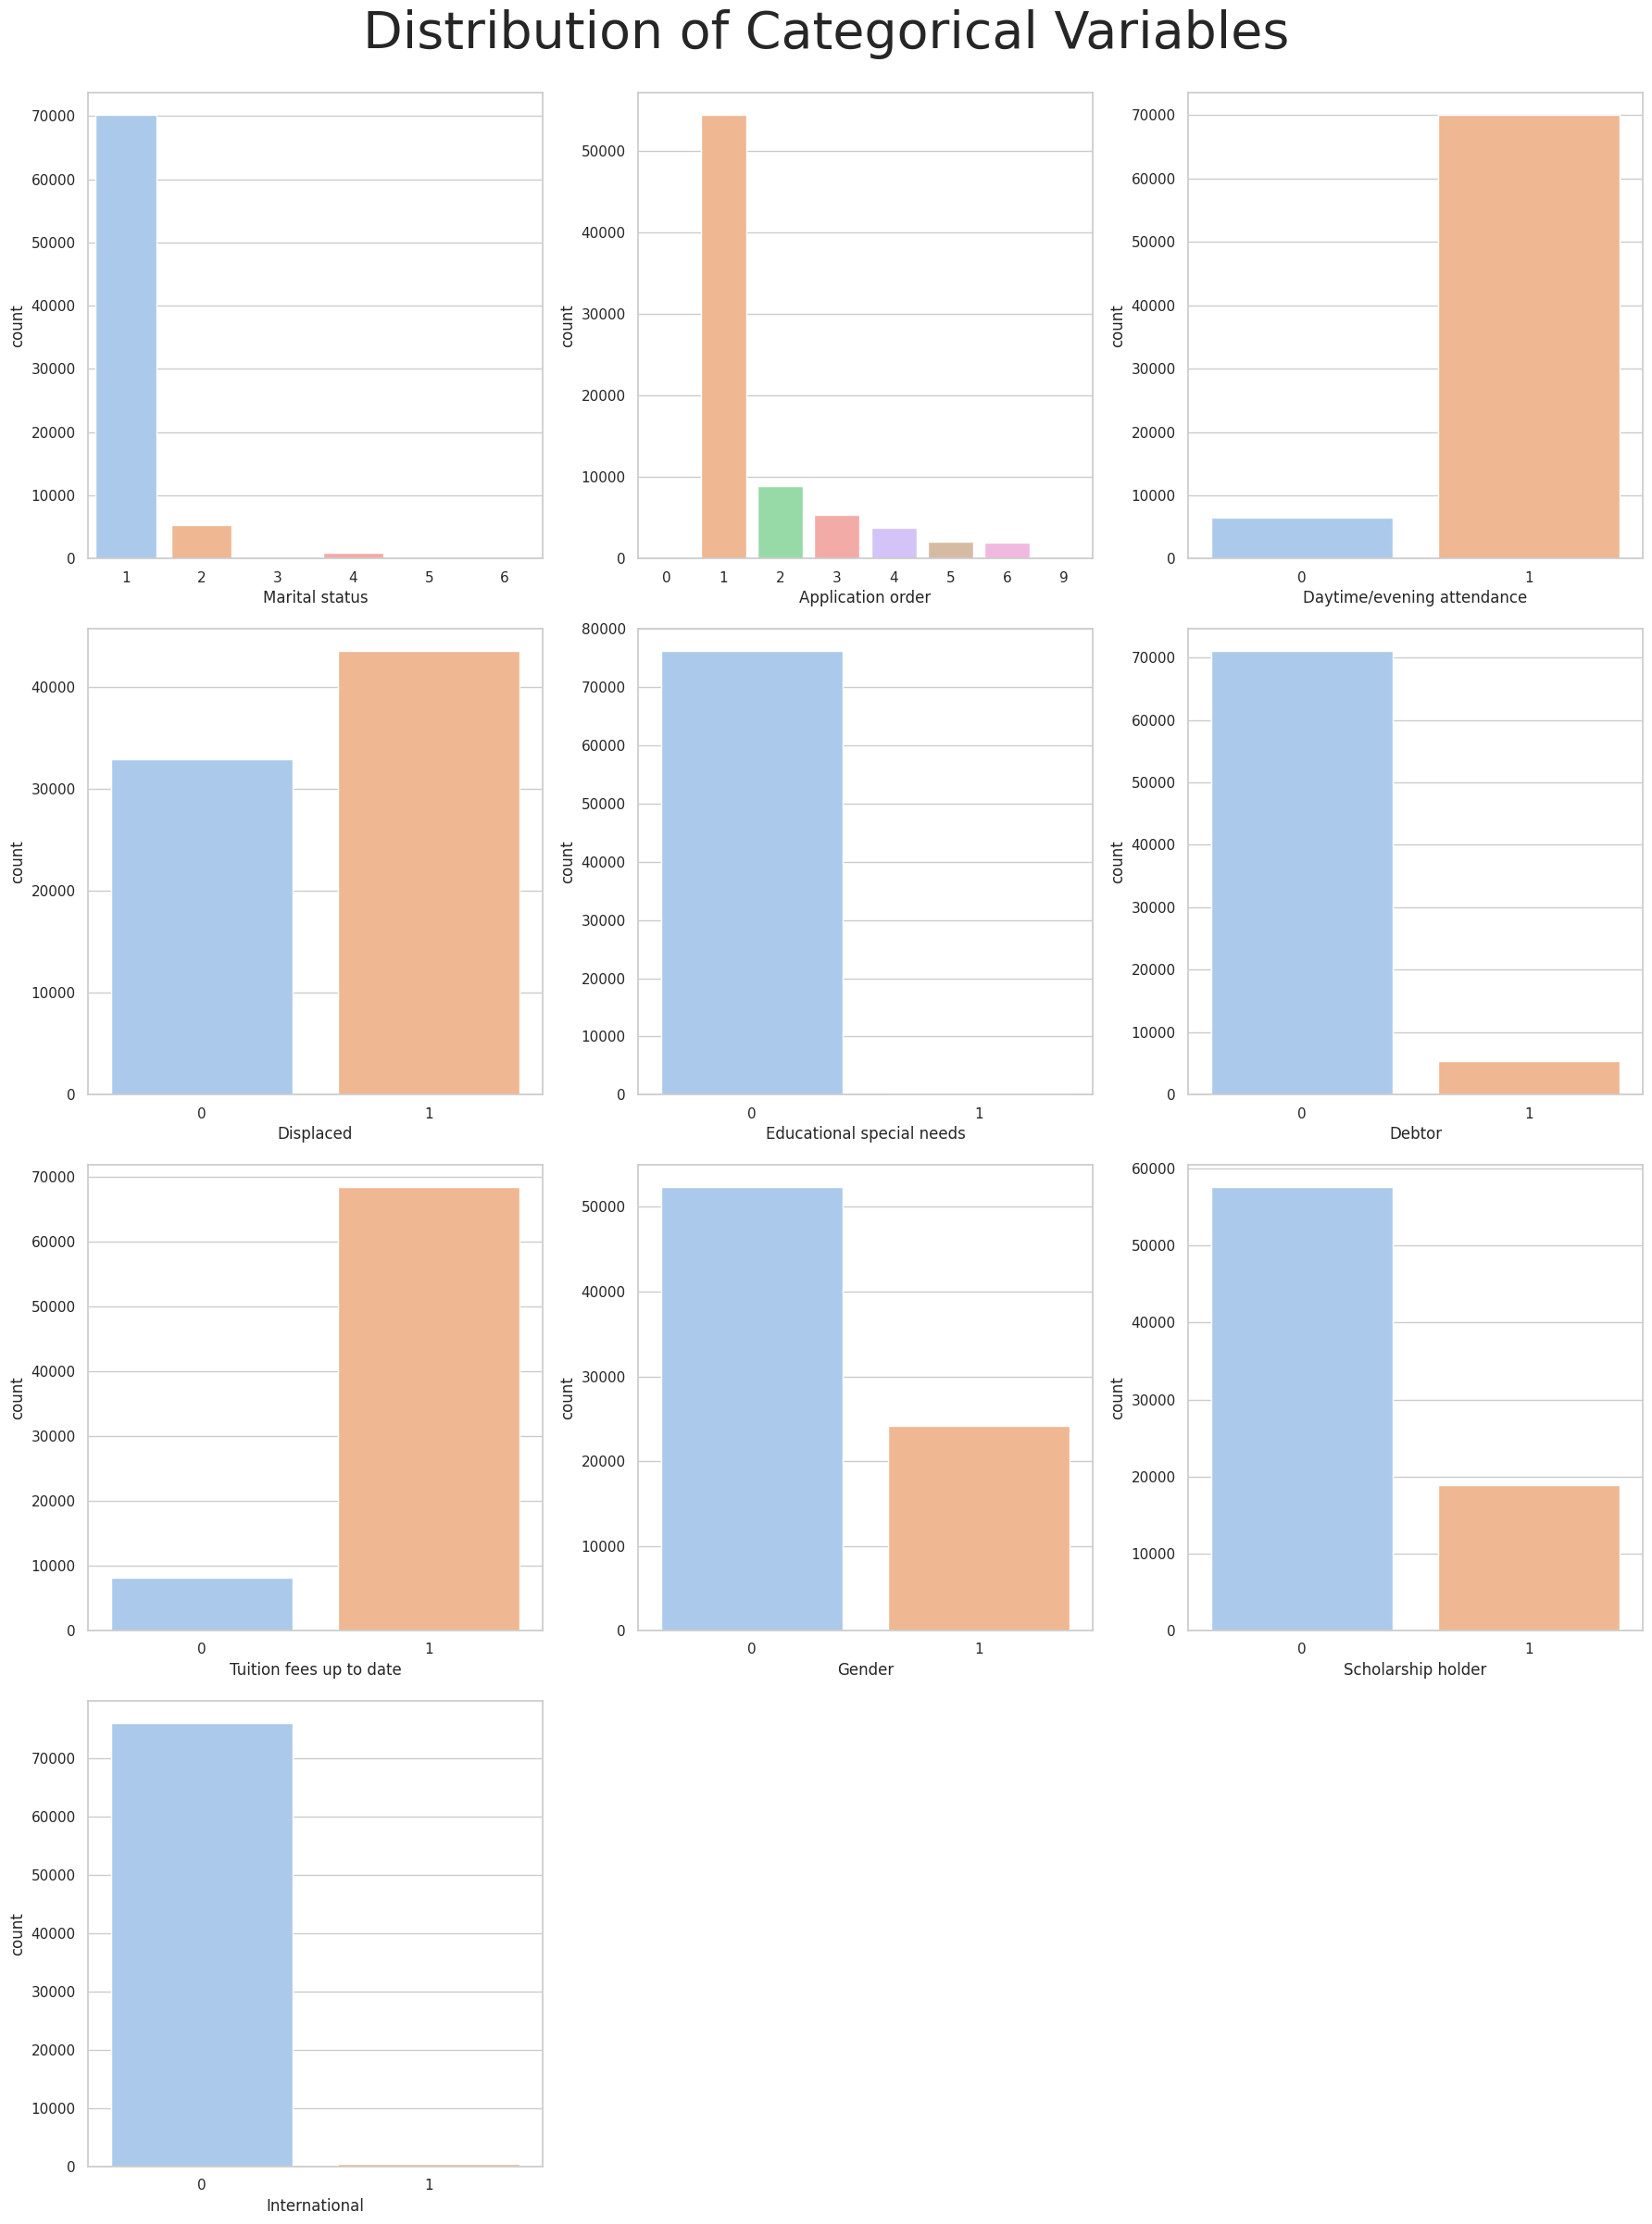

In [20]:
# Distribution of categorical variables
plt.figure(figsize=(18, 24))
plotnumber = 1

for col in cat_features:
    if plotnumber <= len(cat_features):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x = train[col], data = train, palette = 'pastel')

        # Add labels to each bar in the plot
        # for p in ax.patches:
        #     ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(col)
        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

### Distribution Of Categorical Features by target

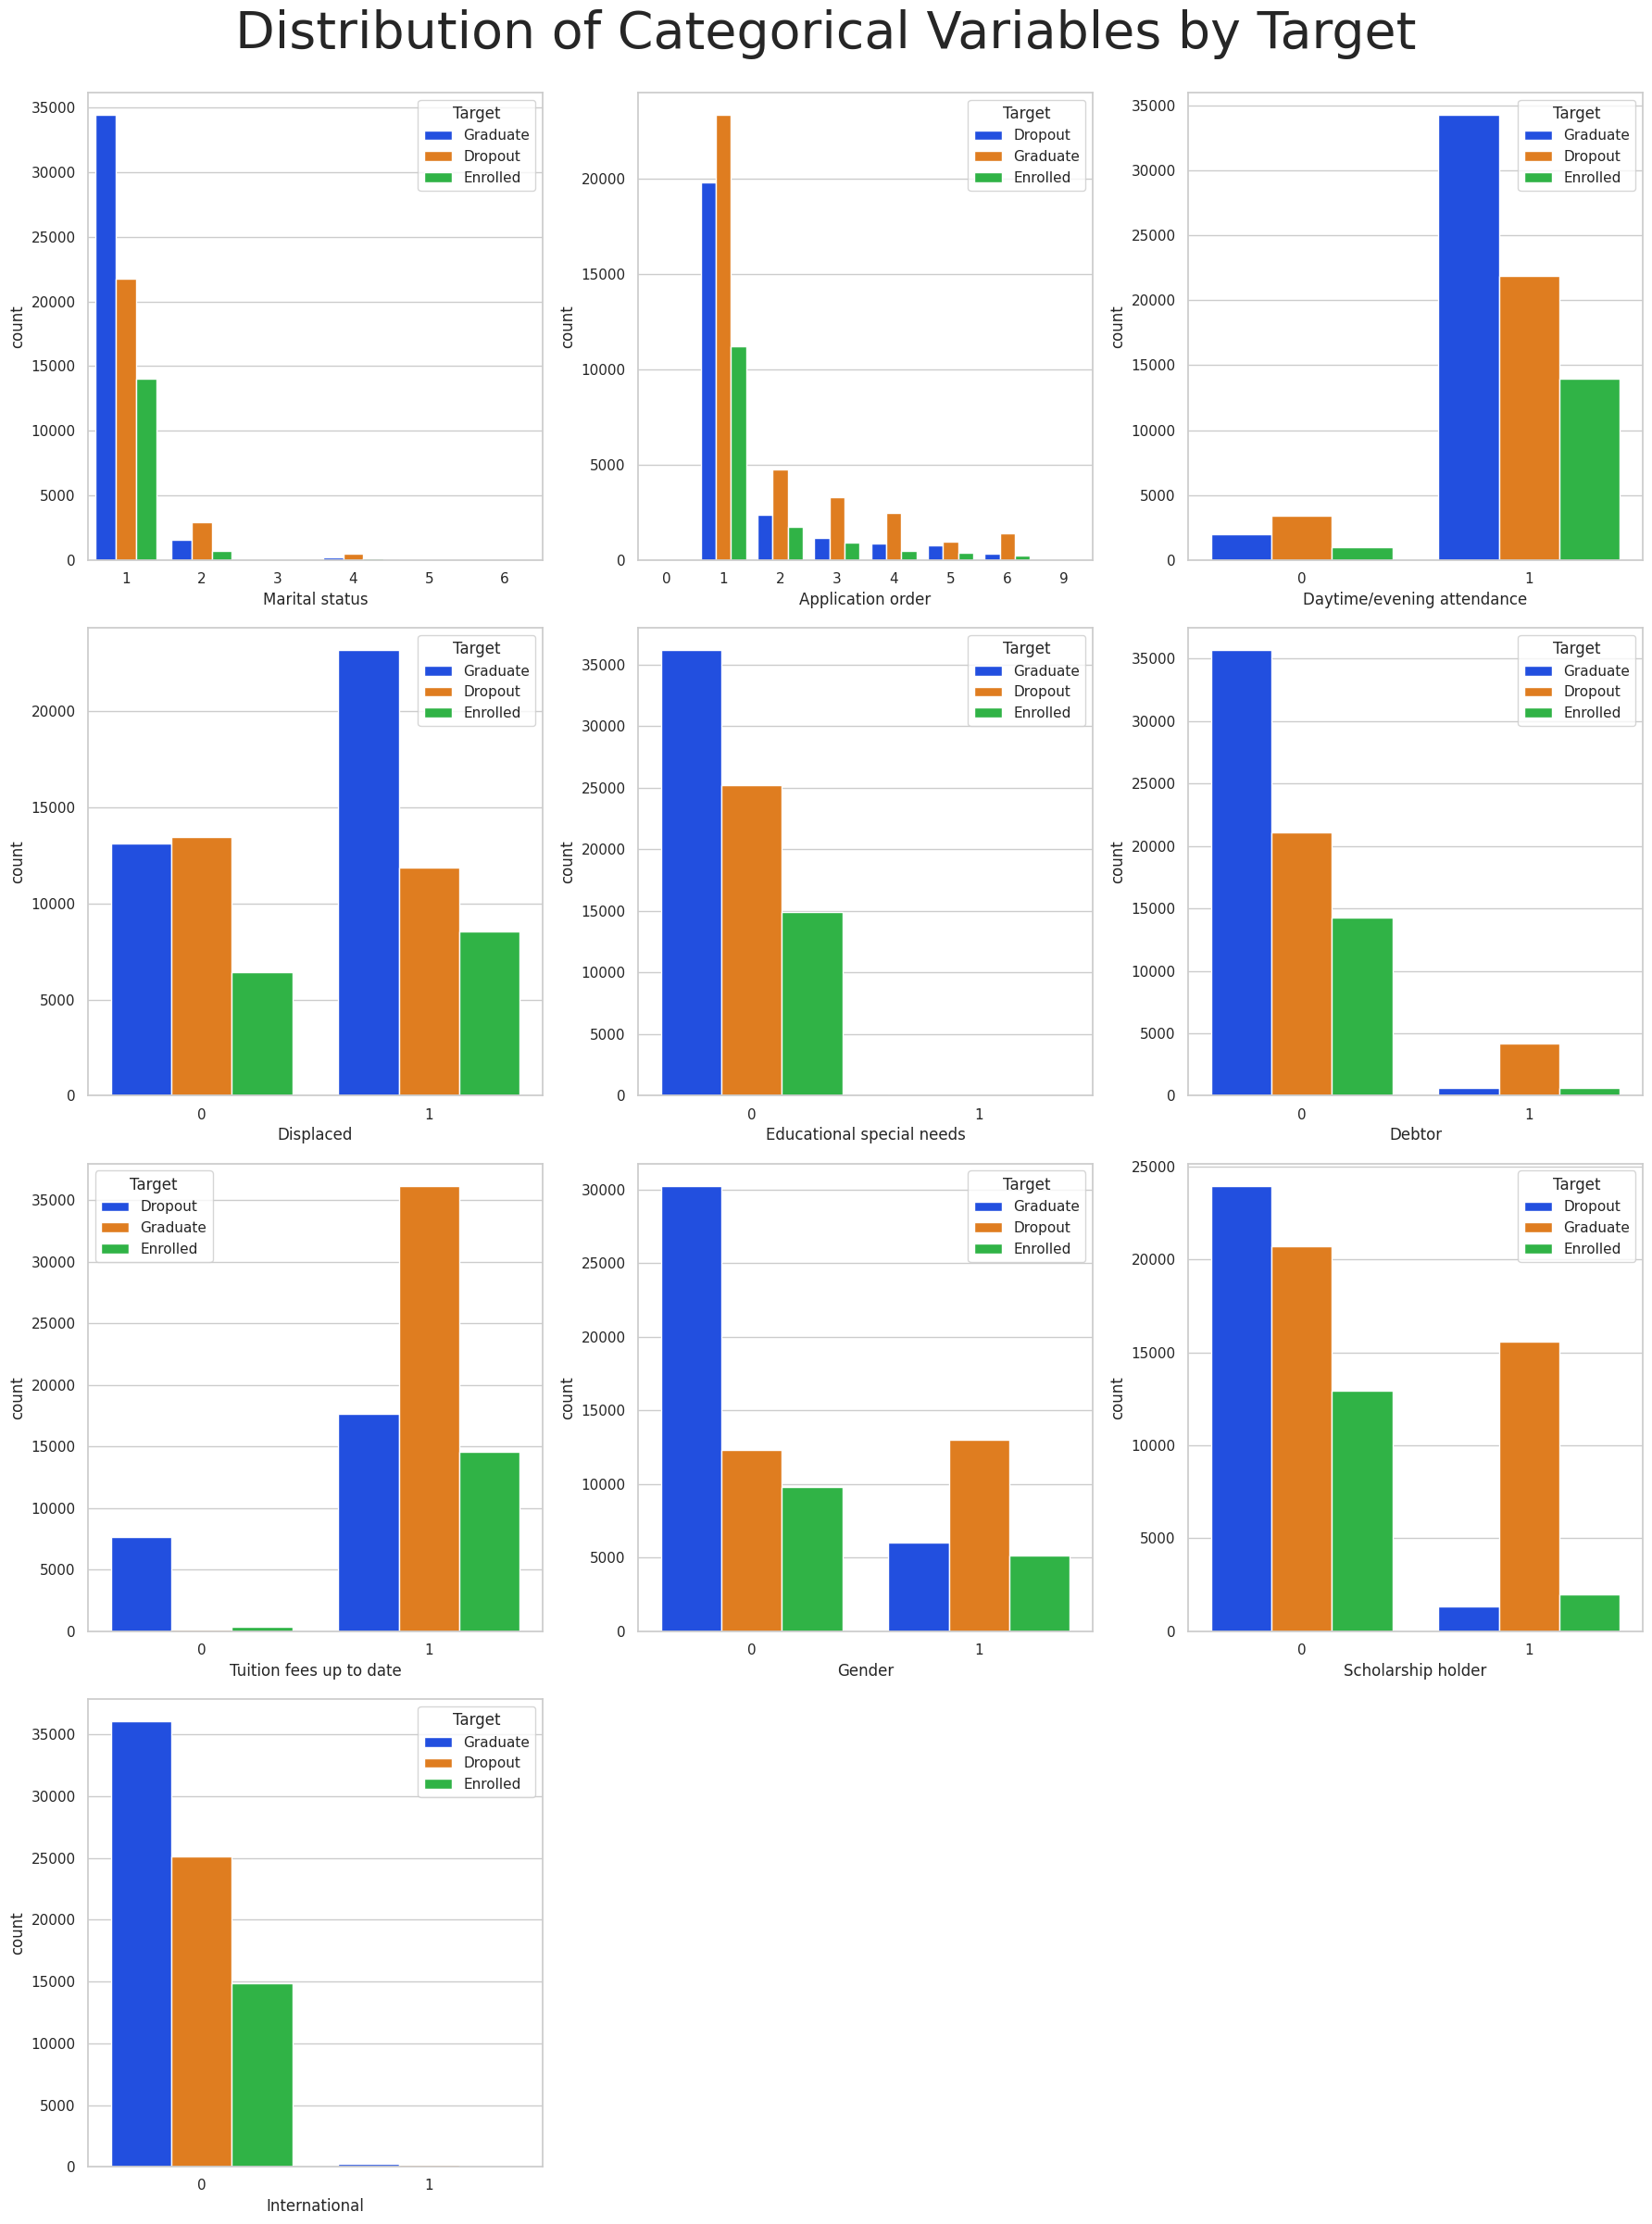

In [21]:
plt.figure(figsize=(18, 24))
plotnumber = 1

# Loop through each column
for col in cat_features:
    if plotnumber <= len(cat_features):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x = train[col], hue = train['Target'], palette = 'bright')

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

### Distribution Of Numerical Features

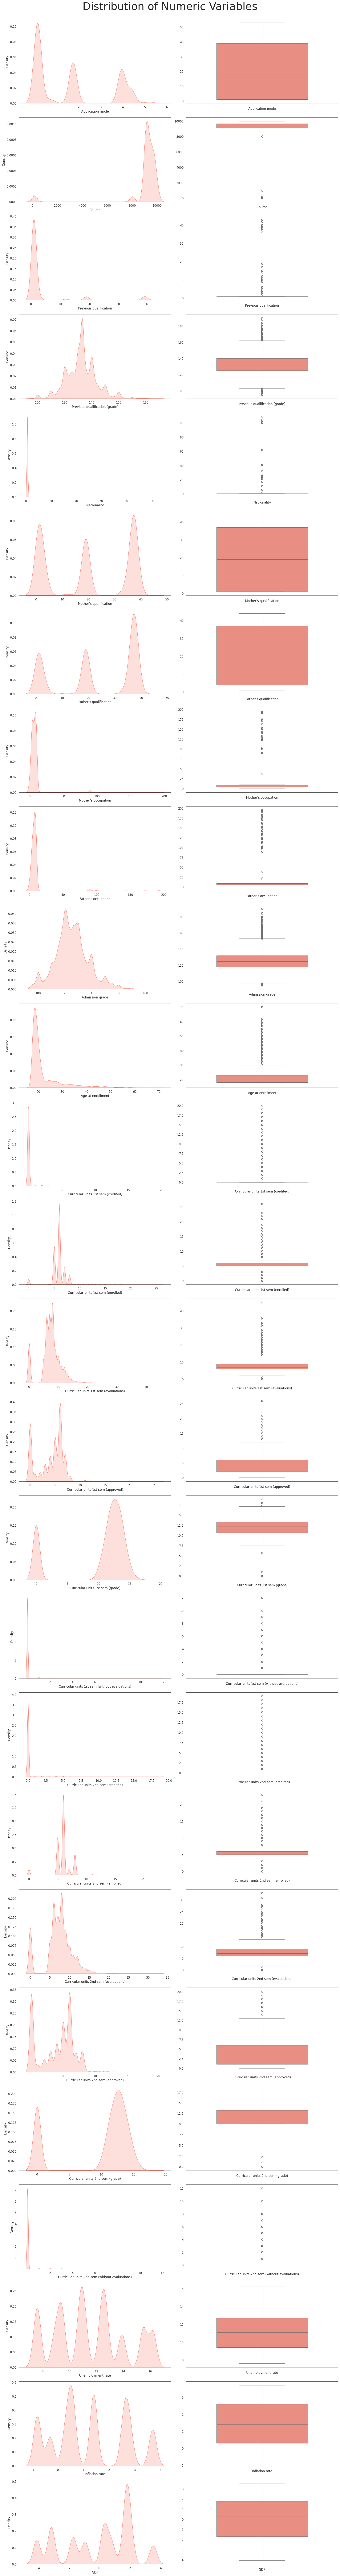

In [22]:
plt.figure(figsize=(18, 135))
plotnumber = 1

for col in num_features:
    if plotnumber <= len(num_features):

        ax1 = plt.subplot(len(num_features), 2, 2 * plotnumber - 1)
        sns.kdeplot(train[col], color = 'salmon', fill = True)
        for spine in ax1.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax1.set_xlabel(col)
        ax1.grid(False)

        ax2 = plt.subplot(len(num_features), 2, 2 * plotnumber)
        sns.boxplot(y = train[col], color = 'salmon', width = 0.6, linewidth = 1)
        for spine in ax2.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(0.5)
        ax2.set_xlabel(col)
        ax2.set_ylabel('')
        ax2.grid(False)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

### Correlation Matrix

In [23]:
# encoding label
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
train['Target'] = encode.fit_transform(train['Target'])

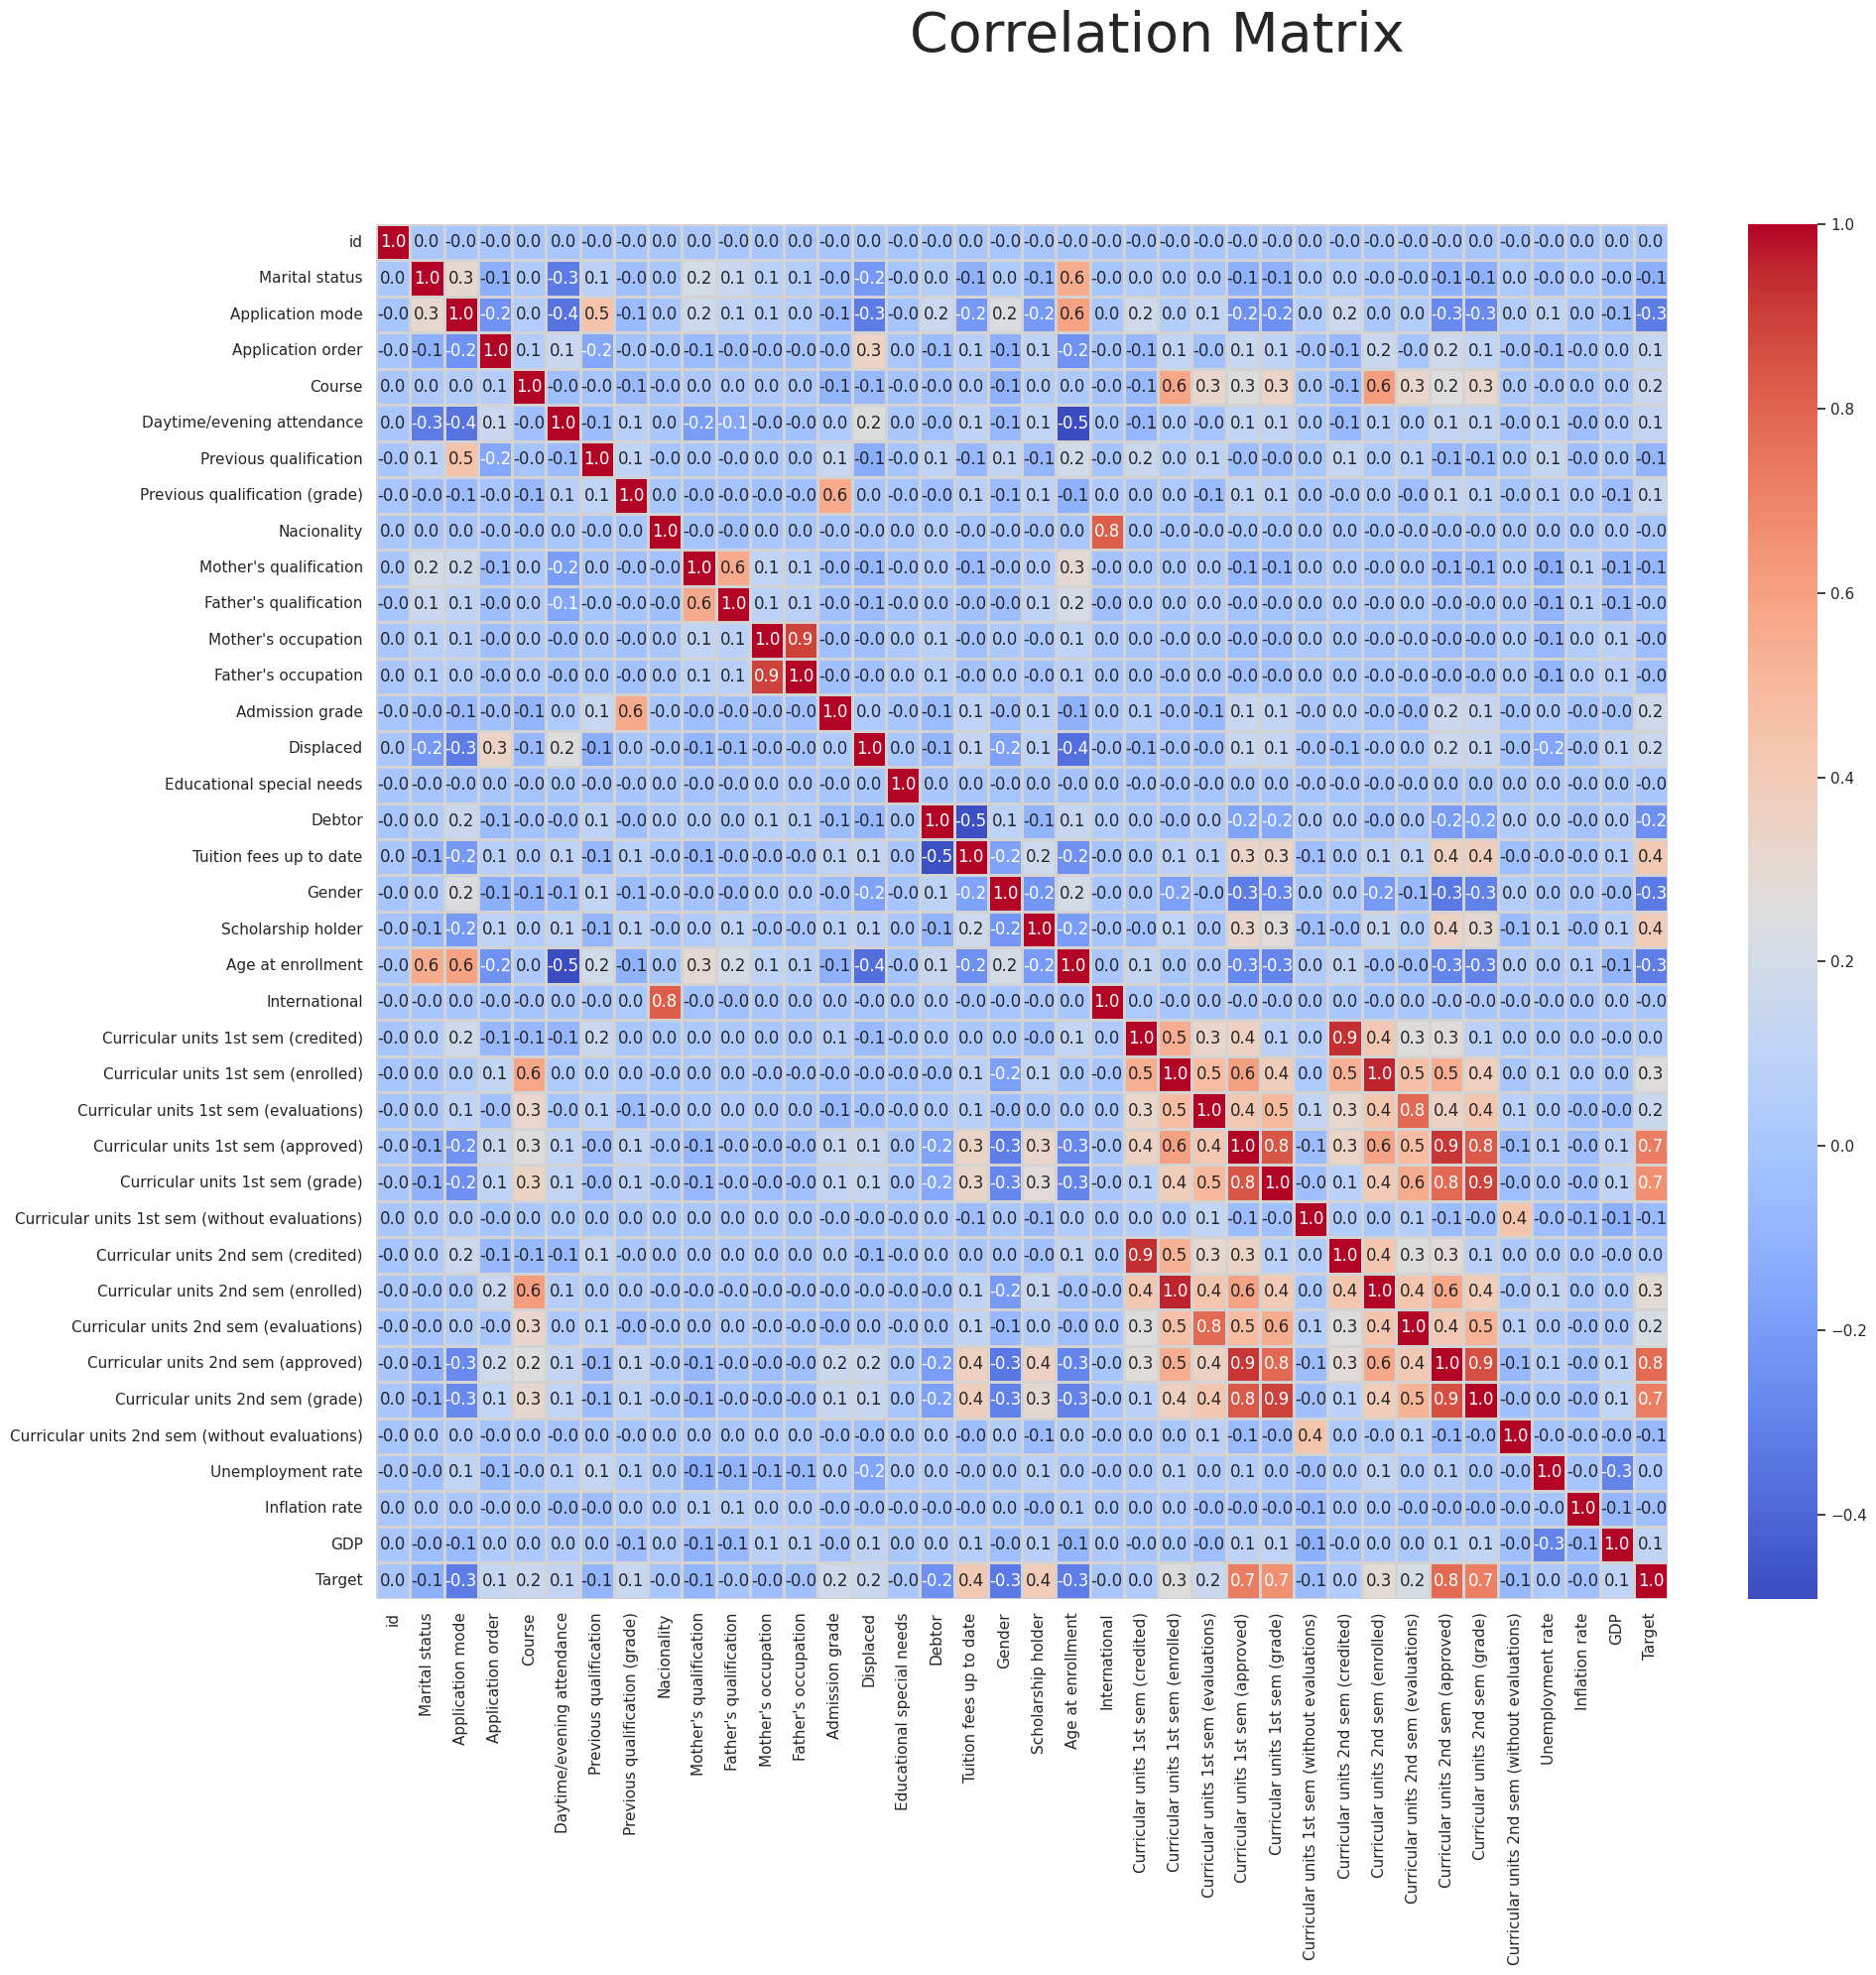

In [24]:
# Correlation matrix
plt.figure(figsize = (21, 18))
sns.heatmap(train.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f', linewidths = 2, linecolor = 'lightgrey')
plt.suptitle('Correlation Matrix', fontsize = 40, y = 1)
plt.show()

### Comparing train, test and the original data


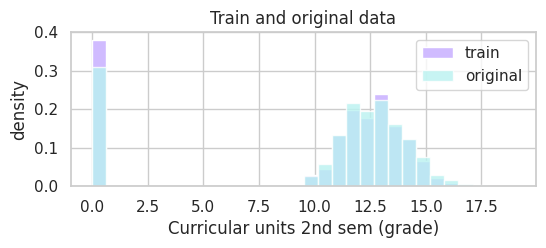

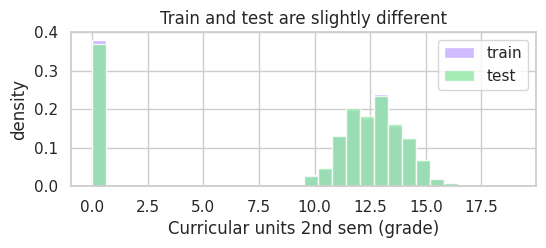

In [31]:
plt.figure(figsize=(6, 2))
plt.hist(train['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         color = 'm',
         label = 'train')
plt.hist(original_data['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         alpha = 0.8,
         color = 'c',
         label = 'original')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('density')
plt.title('Train and original data')
plt.legend()
plt.show()

plt.figure(figsize=(6, 2))
plt.hist(train['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         color = 'm',
         label = 'train')
plt.hist(test['Curricular units 2nd sem (grade)'],
         bins = np.linspace(0, 19, 31),
         density = True,
         alpha = 0.8,
         color = 'g',
         label = 'test')
plt.xlabel('Curricular units 2nd sem (grade)')
plt.ylabel('density')
plt.title('Train and test are slightly different')
plt.legend()
plt.show()

In [32]:
from scipy.stats import mannwhitneyu

print('Mann–Whitney U test comparing train and original datasets')
print(mannwhitneyu(train['Curricular units 2nd sem (grade)'],
                   original_data['Curricular units 2nd sem (grade)']))

print('\nMann–Whitney U test comparing train and test datasets')
print(mannwhitneyu(train['Curricular units 2nd sem (grade)'],
                   test['Curricular units 2nd sem (grade)']))


Mann–Whitney U test comparing train and original datasets
MannwhitneyuResult(statistic=160945414.5, pvalue=3.0285691238655233e-08)

Mann–Whitney U test comparing train and test datasets
MannwhitneyuResult(statistic=1939815047.0, pvalue=0.06384029023546983)


More formally, we can compare the distributions with a [Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). The low pvalue for the original dataset indicates that the distributions are different. The pvalue for the test dataset is 0.06, which means we shouldn't reject the null hypothesis that the train and test distributions are the same.

    Although the distributions of train and original differ significantly, adding the original dataset to the training dataset improves the score